PLA6113 Exploring Urban Data with Machine Learning
<br>
# Lab 02: Exploratory Data Analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1) Load datasets

####January Yellow Taxi Trip Data
https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet

In [3]:
sys -version

NameError: name 'sys' is not defined

In [2]:
data = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet')

In [3]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


### 2) Check missing values
* This is a really important process to avaoid any wrong results in statistics
* More information about missing data, see 'Python Data Science Handbook, O'Reilly' (p.119)

In [4]:
# Check nulls
data.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64

In [5]:
# Get mean using built-in function
data['passenger_count'].mean()

1.3894533085217193

In [6]:
# Get mean using sum and len
data['passenger_count'].sum()/len(data['passenger_count'])

1.349131530063139

In [7]:
# Replace nulls: replace(np.nan, 0)
data = data.replace(np.nan,0)

In [14]:
data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

In [11]:
# Repeat the previous process
print(data['passenger_count'].mean())
print(data['passenger_count'].sum()/len(data['passenger_count']))

1.349131530063139
1.349131530063139


### 3) Create a new column based on the existing columns

In [ ]:
# Check if trip included a airport in the route

In [14]:
data['airport'] = data['airport_fee'] > 0

In [15]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,airport
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,False
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,False
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,False
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,False
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,False


### 4) Descriptive statistics

In [16]:
# Use describe()
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06
mean,1.707819e+00,1.349132e+00,5.372751e+00,1.374429e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.216090e+00,8.010523e-02
std,5.021375e-01,9.962865e-01,5.478714e+02,5.835917e+00,6.546806e+01,7.079016e+01,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,8.264991e-01,3.082981e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00


In [17]:
# Round the numbers
data.describe().round(2)

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00
mean,1.71,1.35,5.37,1.37,166.08,163.58,1.19,12.95,1.01,0.49,2.39,0.37,0.30,19.17,2.22,0.08
std,0.50,1.00,547.87,5.84,65.47,70.79,0.50,255.81,1.24,0.08,2.83,1.68,0.04,255.96,0.83,0.31
min,1.00,0.00,0.00,0.00,1.00,1.00,0.00,-480.00,-4.50,-0.50,-125.22,-31.40,-0.30,-480.30,-2.50,-1.25
25%,1.00,1.00,1.04,1.00,132.00,113.00,1.00,6.50,0.00,0.50,0.72,0.00,0.30,11.30,2.50,0.00
50%,2.00,1.00,1.74,1.00,162.00,162.00,1.00,9.00,0.50,0.50,2.00,0.00,0.30,14.69,2.50,0.00
75%,2.00,1.00,3.13,1.00,234.00,236.00,1.00,14.00,2.50,0.50,3.00,0.00,0.30,20.02,2.50,0.00
max,6.00,9.00,306159.28,99.00,265.00,265.00,5.00,401092.32,33.50,16.59,888.88,193.30,0.30,401095.62,2.50,1.25


### 5) Histogram

<AxesSubplot:>

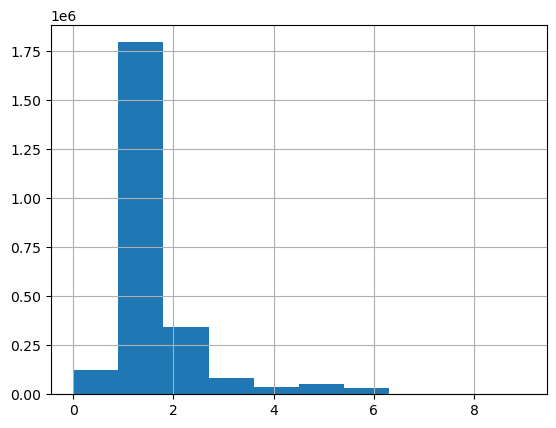

In [18]:
# Obtain histogram, change color, linewidth and alpha (df.column.hist())
data.passenger_count.hist()

### 6) Box plot

<AxesSubplot:>

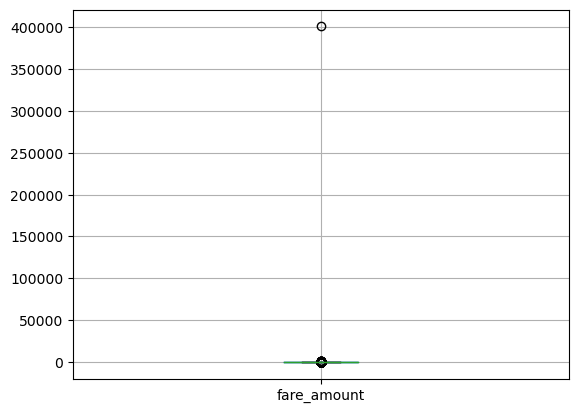

In [20]:
# Get boxplot of two columns
data.boxplot(column=['fare_amount'])

### 7) Scatter plot

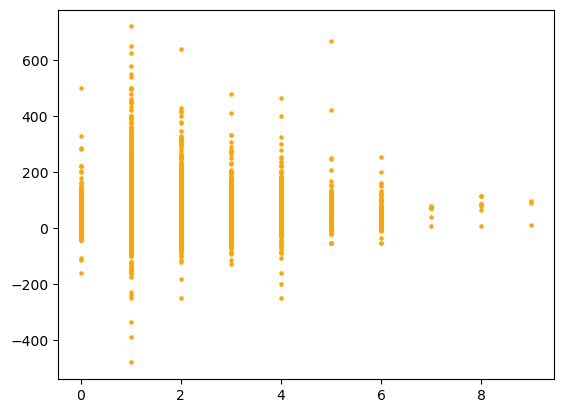

In [21]:
# Scatter plot of two columns
plt.scatter(data[data['fare_amount']<1000]['passenger_count'],data[data['fare_amount']<1000]['fare_amount'], s=5, c='Orange')

### 8) Correlation test
* Compute pairwise correlation of columns, excluding NA/null values
* Method of correlation
    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation

In [23]:
# Correlation
data.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,airport
VendorID,1.000000,0.093158,0.002708,-0.085996,0.020493,-0.011890,-0.059438,0.001257,-0.794803,-0.040216,0.010230,-0.001530,-0.046879,0.001149,-0.056391,0.010601,0.011654
passenger_count,0.093158,1.000000,-0.005448,-0.012591,-0.009762,0.000298,0.098708,0.000048,-0.080126,-0.000137,0.003880,0.017072,0.003175,0.000325,0.117078,0.025192,0.025427
trip_distance,0.002708,-0.005448,1.000000,-0.000416,-0.002976,-0.001123,-0.009932,0.000406,-0.003212,-0.000433,0.005931,0.006968,0.000453,0.000505,-0.012859,0.003768,0.003790
RatecodeID,-0.085996,-0.012591,-0.000416,1.000000,-0.037589,-0.025755,-0.009823,0.006640,-0.045831,-0.016088,-0.033049,0.081106,-0.000260,0.006172,-0.156205,0.001053,0.001058
PULocationID,0.020493,-0.009762,-0.002976,-0.037589,1.000000,0.086852,-0.030402,-0.005153,0.009965,0.006547,-0.049700,-0.069462,0.002059,-0.006022,0.102355,-0.121132,-0.122385
DOLocationID,-0.011890,0.000298,-0.001123,-0.025755,0.086852,1.000000,-0.025027,-0.004479,0.014316,0.014051,-0.031311,-0.050200,0.002616,-0.004904,0.106103,-0.059785,-0.060672
payment_type,-0.059438,0.098708,-0.009932,-0.009823,-0.030402,-0.025027,1.000000,-0.000011,0.025773,-0.274908,-0.387612,-0.018029,-0.315774,-0.005173,-0.006082,0.033079,0.040549
fare_amount,0.001257,0.000048,0.000406,0.006640,-0.005153,-0.004479,-0.000011,1.000000,0.000721,-0.000337,0.024442,0.027901,0.007022,0.999875,-0.011655,0.027048,0.026885
extra,-0.794803,-0.080126,-0.003212,-0.045831,0.009965,0.014316,0.025773,0.000721,1.000000,0.092066,0.027354,0.021701,0.081448,0.002474,0.199501,0.023421,0.021382
mta_tax,-0.040216,-0.000137,-0.000433,-0.016088,0.006547,0.014051,-0.274908,-0.000337,0.092066,1.000000,-0.009909,-0.093360,0.862321,0.000960,0.401453,0.025391,0.005169


### 9) Correlation matrix plot

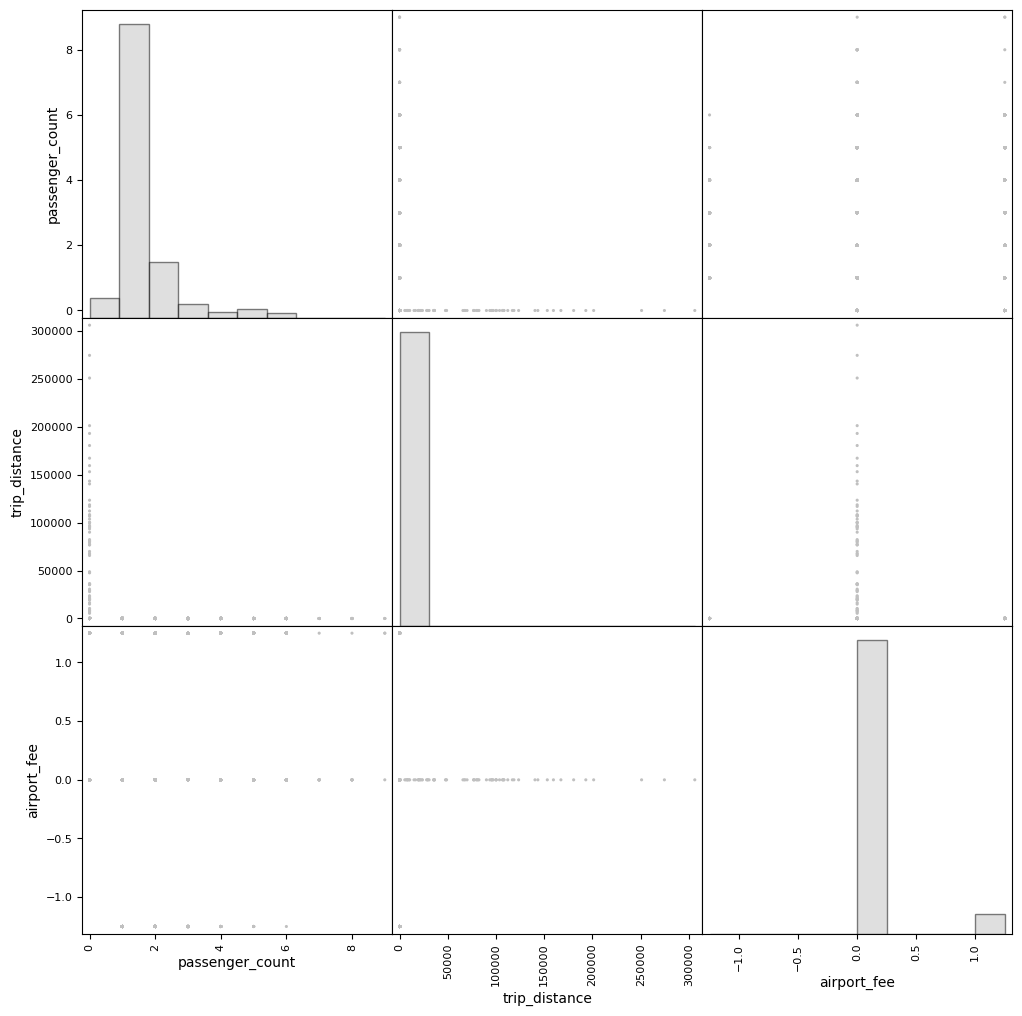

In [24]:
from pandas.plotting import scatter_matrix

scatter_matrix(data[['passenger_count','trip_distance','airport_fee']],
               alpha=1, figsize=(12, 12), diagonal='hist',
               hist_kwds={'color':'Silver', 'edgecolor':'k', 'alpha':0.5},
               s=20, color='Silver')
plt.show()

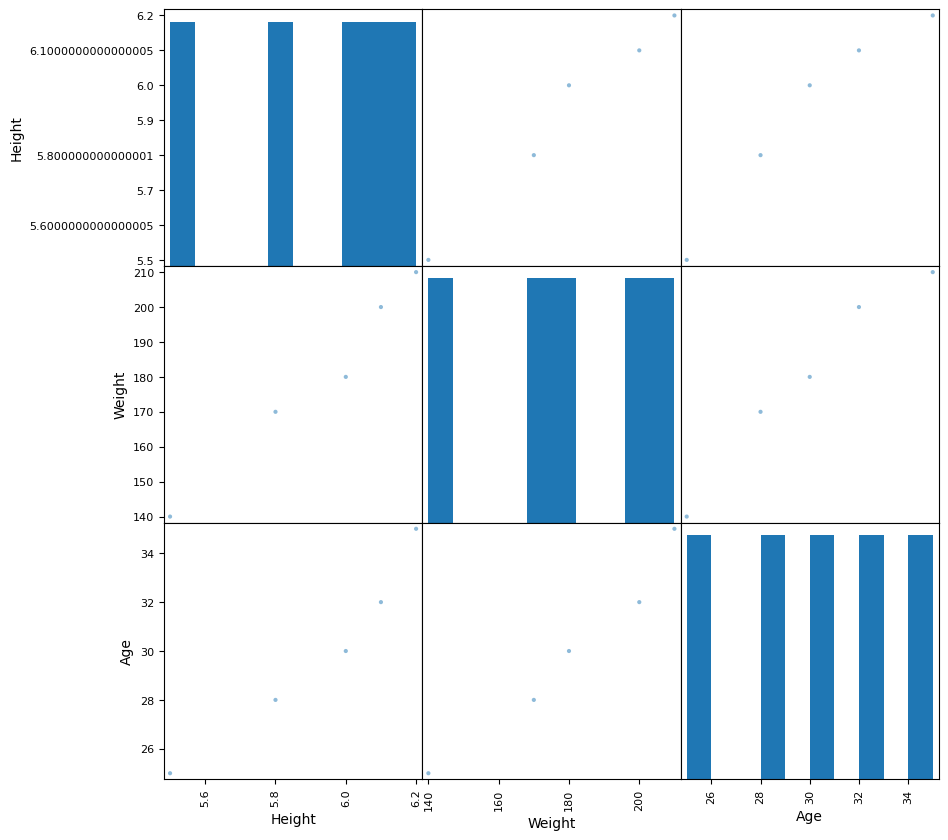

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# 创建数据集
data = {'Height': [6, 5.5, 5.8, 6.1, 6.2], 
        'Weight': [180, 140, 170, 200, 210], 
        'Age': [30, 25, 28, 32, 35]}
df = pd.DataFrame(data)

# 使用scatter_matrix绘制散点图矩阵
scatter_matrix(df, figsize=(10, 10))
plt.show()

### 11) Mapping with spatial data

If you don't have geopandas, please read through the instructions posted on Canvas and try to install geopandas to your local machine. 

In [ ]:
# !apt install gdal-bin python-gdal python3-gdal
# !apt install python3-rtree 
# !pip install descartes
# !pip install geopandas

In [26]:
import geopandas as gpd

In [28]:
# Assign randomly borough
# df["column"] = np.random.choice(list, size=len(df))
# Read geojson and merge
# https://github.com/codeforgermany/click_that_hood/blob/main/public/data/new-york-city-boroughs.geojson

In [ ]:
# Plot


### 12) Choropleth map
* Definition: A choropleth map is a type of thematic map in which areas are shaded or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income.

In [ ]:
# Plot a choropleth